# Adult census income prediction

## Problem statement : 
* Problem Statement:
The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the >50K group or <=50K group.

### import required libraries of python

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection,preprocessing,tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier 

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## EDA 

### The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
print(df['salary'].value_counts())

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64


In [8]:
print(df['sex'].value_counts())

 Male      21790
 Female    10771
Name: sex, dtype: int64


In [9]:
a = [df['country'].value_counts()]
a

[ United-States                 29170
  Mexico                          643
  ?                               583
  Philippines                     198
  Germany                         137
  Canada                          121
  Puerto-Rico                     114
  El-Salvador                     106
  India                           100
  Cuba                             95
  England                          90
  Jamaica                          81
  South                            80
  China                            75
  Italy                            73
  Dominican-Republic               70
  Vietnam                          67
  Guatemala                        64
  Japan                            62
  Poland                           60
  Columbia                         59
  Taiwan                           51
  Haiti                            44
  Iran                             43
  Portugal                         37
  Nicaragua                        34
  Peru      

In [10]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1835
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [11]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

## Data  visualization

## Age

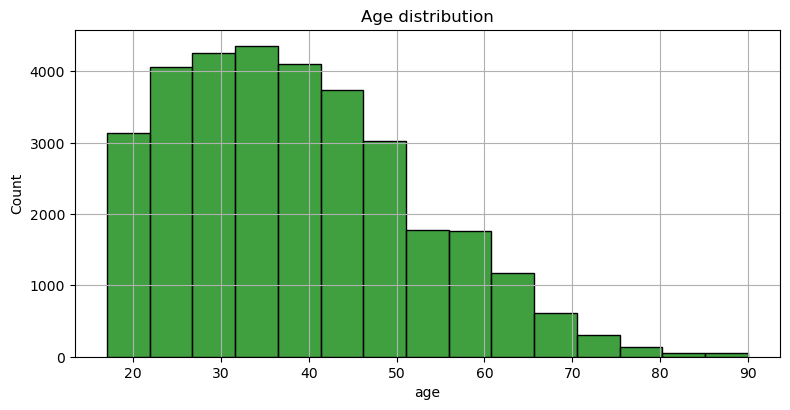

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

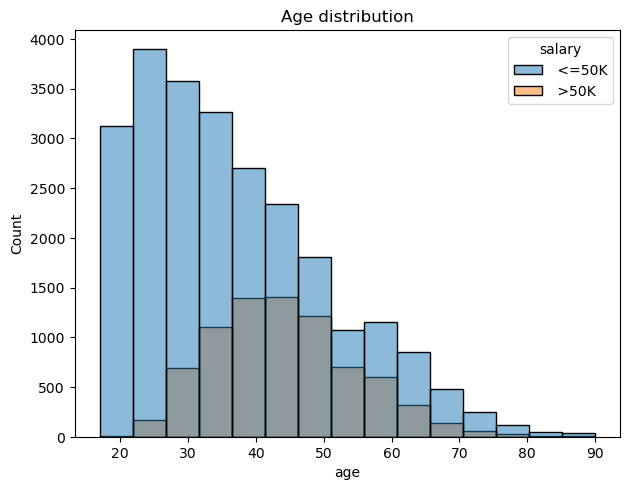

In [13]:
sns.histplot(x=df['age'],hue=df['salary'],color='green',bins=15)
plt.tight_layout()
plt.title('Age distribution')
plt.show()

From the graph we can see that in the age group 0-20 there isn't any entry of salary greater than 50k, same goes with the group greater than 75 years.

### work class

In [14]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', nan, ' Without-pay',
       ' Never-worked'], dtype=object)

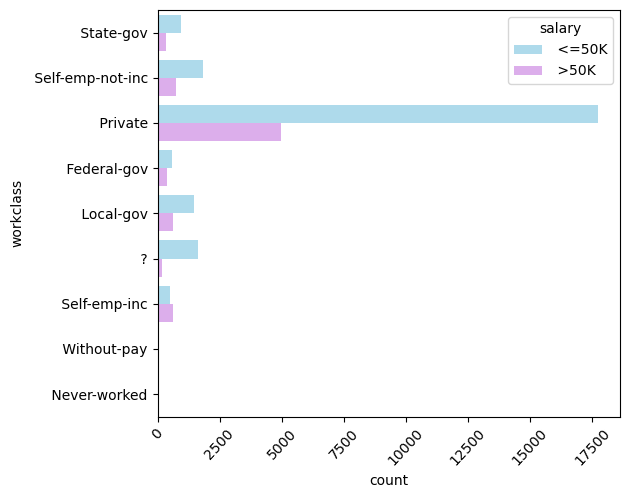

In [15]:
sns.countplot(y=df['workclass'], hue = df['salary'], palette=['#a4def5','#e1a4f5'])
plt.tight_layout()
plt.xticks(rotation = 47)
plt.show()

* The majority of the individuals work in the private sector. The probabilities of making above 50,000 are similar among the work classes except for self-emp-inc and federal government. Federal government is seen as the most elite in the public sector, which most likely explains the higher chance of earning more than 50,000.

###   occupation

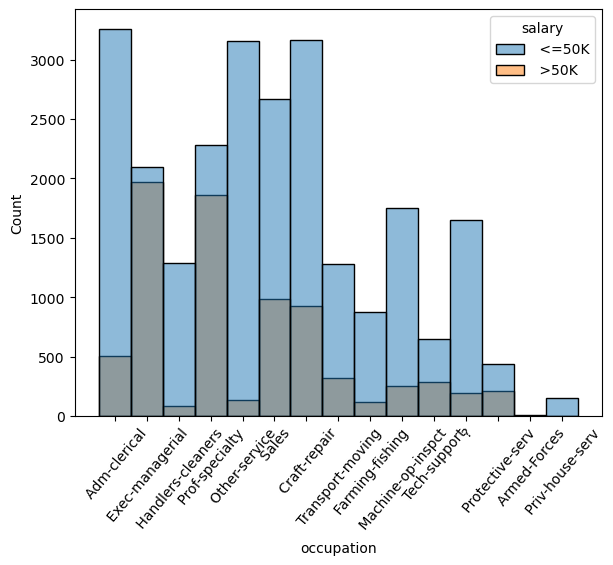

In [16]:
sns.histplot(x=df['occupation'], hue=df['salary'], color='green',bins=15)
plt.tight_layout()
plt.xticks(rotation = 50)
plt.show()

### race

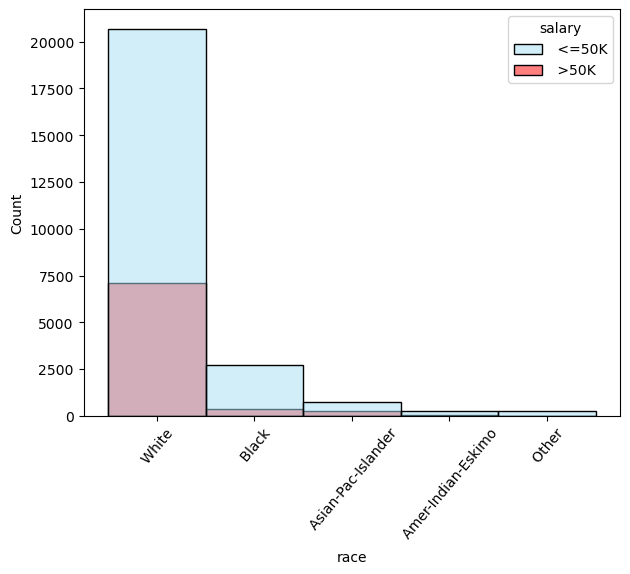

In [17]:
sns.histplot(x = df['race'], hue = df['salary'],color = 'green',bins = 15 ,palette = ['#a4def5','red'])
plt.tight_layout()
plt.xticks(rotation = 50)
plt.show()

### sex

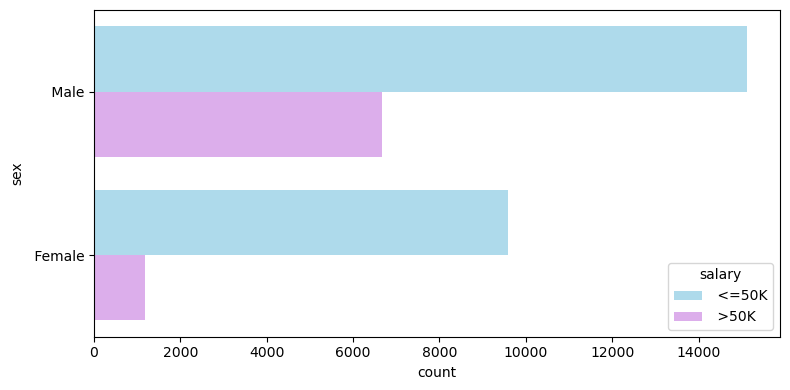

In [18]:
plt.figure(figsize = [8,4])
sns.countplot(y=df['sex'],hue = df['salary'],palette=['#a4def5','#e1a4f5'])
plt.tight_layout()
plt.show()

* The percentage of males who make greater than 50,000 is much greater than the percentage of females that make the same amount. This will certainly be a significant factor, and should be a feature considered in our prediction model.

### capital gain

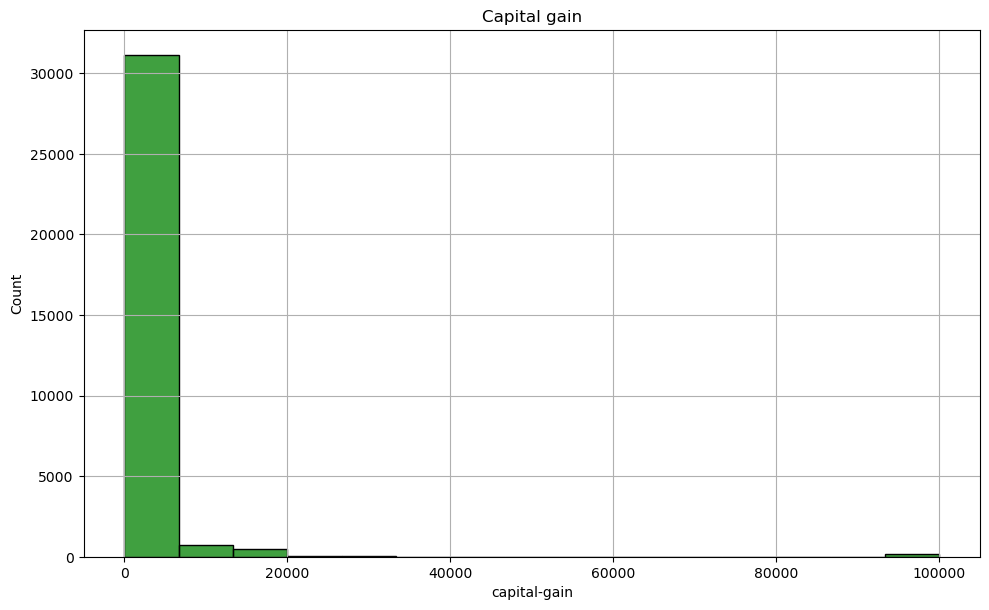

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['capital-gain'], color = 'green', bins = 15)
plt.tight_layout()
plt.grid(True)
plt.title('Capital gain')
plt.show() 

* From the graph we can see that the distribution of capital gain is very skewed.
* And there are outliers at data poitn 100000.

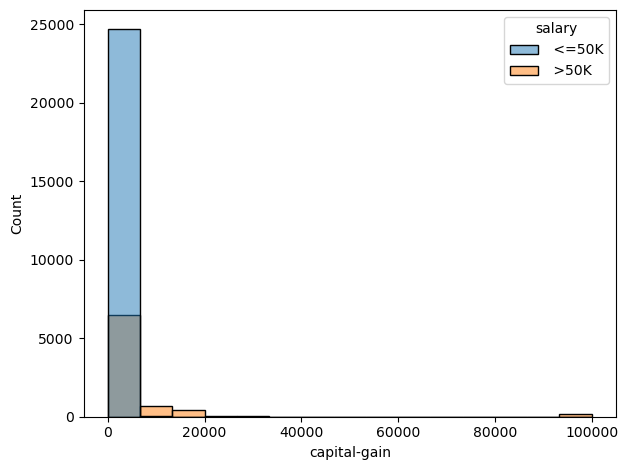

In [20]:
sns.histplot(x=df['capital-gain'],hue=df['salary'],color='green',bins=15)
plt.tight_layout()
plt.show()

### capital loss

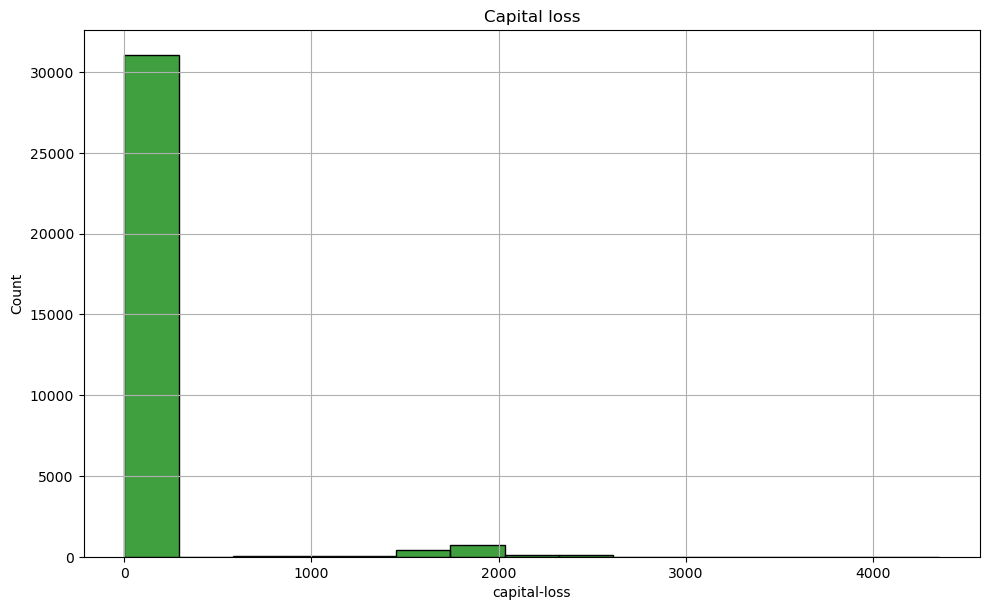

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['capital-loss'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Capital loss')
plt.show()

### hours per week

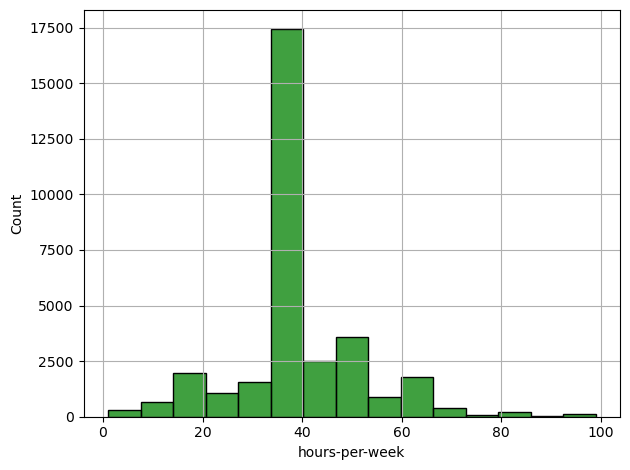

In [22]:
sns.histplot(df['hours-per-week'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.show()

* We can see that vast majority of values are of 40 hours. what we can do is make 3 classes, i.e <40hrs, 40hrs and >40hrs, and check whther it is significant or not.

In [23]:
def hrs_edit(val):
    if (val<40):
        return ('<40 hrs')
    elif (val==40):
        return ('40 hrs')
    else:
        return ('>40hrs') 

In [24]:
df['hours-per-week']=df['hours-per-week'].apply(hrs_edit)

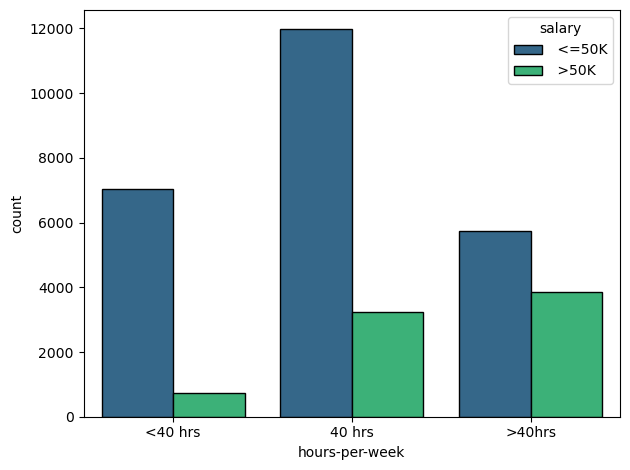

In [25]:
sns.countplot(x=df['hours-per-week'],hue=df['salary'],palette='viridis',
              saturation=0.9,edgecolor="black",order=['<40 hrs','40 hrs','>40hrs'])
plt.tight_layout()
plt.show()

* The percentage of individuals making over 50,000 drastically decreases when less than 40 hours per week, and increases significantly when greater than 40 hours per week.

### country

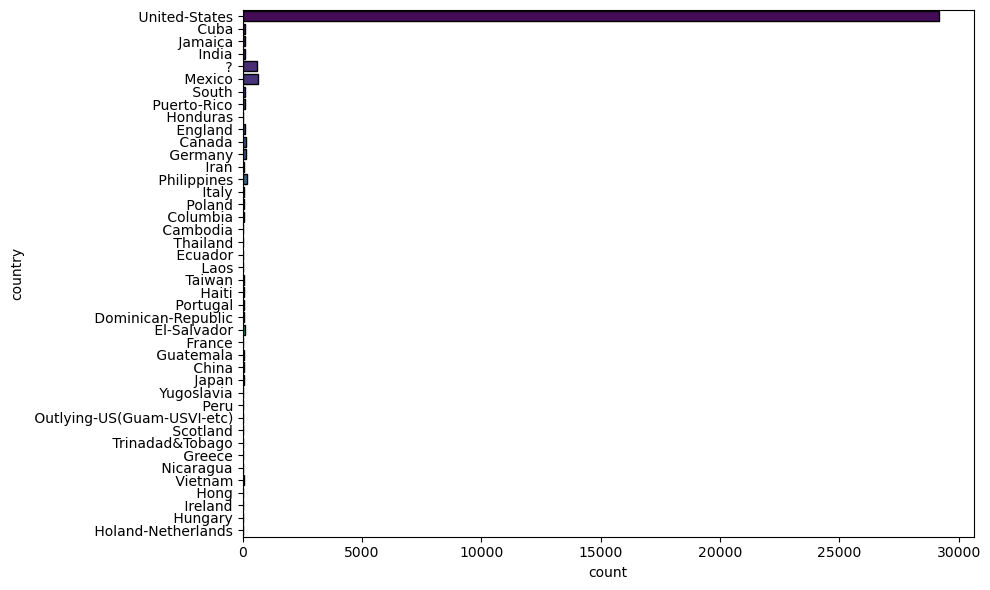

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['country'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.show()

### Feature engineering
1. We will drop the features:
  * fnlwgt
  * education
  * relationship
  * race
2. Impute Nan values with mode.

3. train - test split.

4. Lable encoding.

### Dropping Education - Education Num is enough.
### Dropping Final Weight - highly discrete data so not useful

In [27]:
df = df.drop(['education','fnlwgt','race','relationship'],axis = 1)
df

,age,workclass,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Male,2174,0,40 hrs,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<40 hrs,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,40 hrs,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Male,0,0,40 hrs,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Female,0,0,40 hrs,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Female,0,0,<40 hrs,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40 hrs,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Female,0,0,40 hrs,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Male,0,0,<40 hrs,United-States,<=50K


### Replacing ? with NaN

In [28]:
df.isin([' ?']).sum()

age                  0
workclass         1835
education-num        0
marital-status       0
occupation        1843
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [29]:
df['workclass'].replace(' ?',0,inplace = True)
df['occupation'].replace(' ?',0,inplace = True)
df['country'].replace(' ?',0,inplace = True)

In [30]:
df['workclass'].replace(0,np.nan,inplace = True)
df['occupation'].replace(0,np.nan,inplace = True)
df['country'].replace(0,np.nan,inplace = True)

In [31]:
df["workclass"] = df["workclass"].fillna(df["workclass"].mode()[0])
df["occupation"] = df["occupation"].fillna(df["occupation"].mode()[0])
df["country"] = df["country"].fillna(df["country"].mode()[0])

In [32]:
df["workclass"].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [33]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [34]:
def married(val):
    if val==' Never-married':
        return 'not-married'
    elif val==' Divorced':
        return 'not-married'
    elif val==' Separated':
        return 'not-married'
    elif val==' Widowed':
        return 'not-married'
    else:
        return 'married'

In [35]:
df['marital-status']=df['marital-status'].apply(married)

In [36]:
df['marital-status'].unique()
df['occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

## Label Encoding

In [37]:
encoder = preprocessing.LabelEncoder()

In [38]:
df['workclass'] = encoder.fit_transform(df['workclass'])
df['marital-status'] = encoder.fit_transform(df['marital-status'])
df['occupation'] = encoder.fit_transform(df['occupation'])
df['sex'] = encoder.fit_transform(df['sex'])
df['country'] = encoder.fit_transform(df['country'])
df['salary'] = encoder.fit_transform(df['salary'])
df['hours-per-week'] = encoder.fit_transform(df['hours-per-week'])

In [39]:
df

,age,workclass,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,6,13,1,0,1,2174,0,0,38,0
1,50,5,13,0,3,1,0,0,1,38,0
2,38,3,9,1,5,1,0,0,0,38,0
3,53,3,7,0,5,1,0,0,0,38,0
4,28,3,13,0,9,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,12,0,12,0,0,0,1,38,0
32557,40,3,9,0,6,1,0,0,0,38,1
32558,58,3,9,1,0,0,0,0,0,38,0
32559,22,3,9,1,0,1,0,0,1,38,0


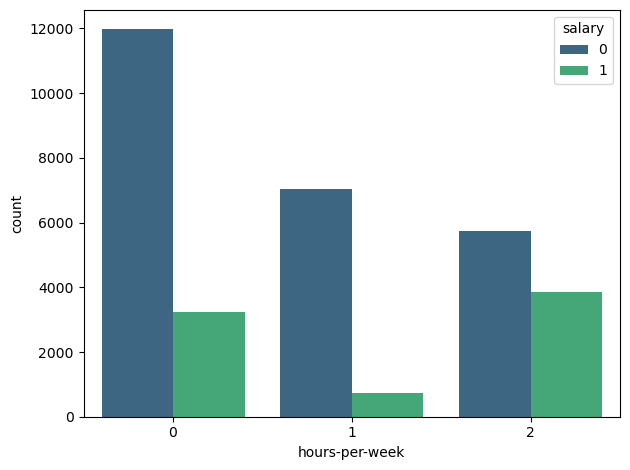

In [40]:
sns.countplot(x=df['hours-per-week'],hue=df['salary'],palette='viridis'
             )
plt.tight_layout()
plt.show()

In [41]:
df['education-num'].max()

16

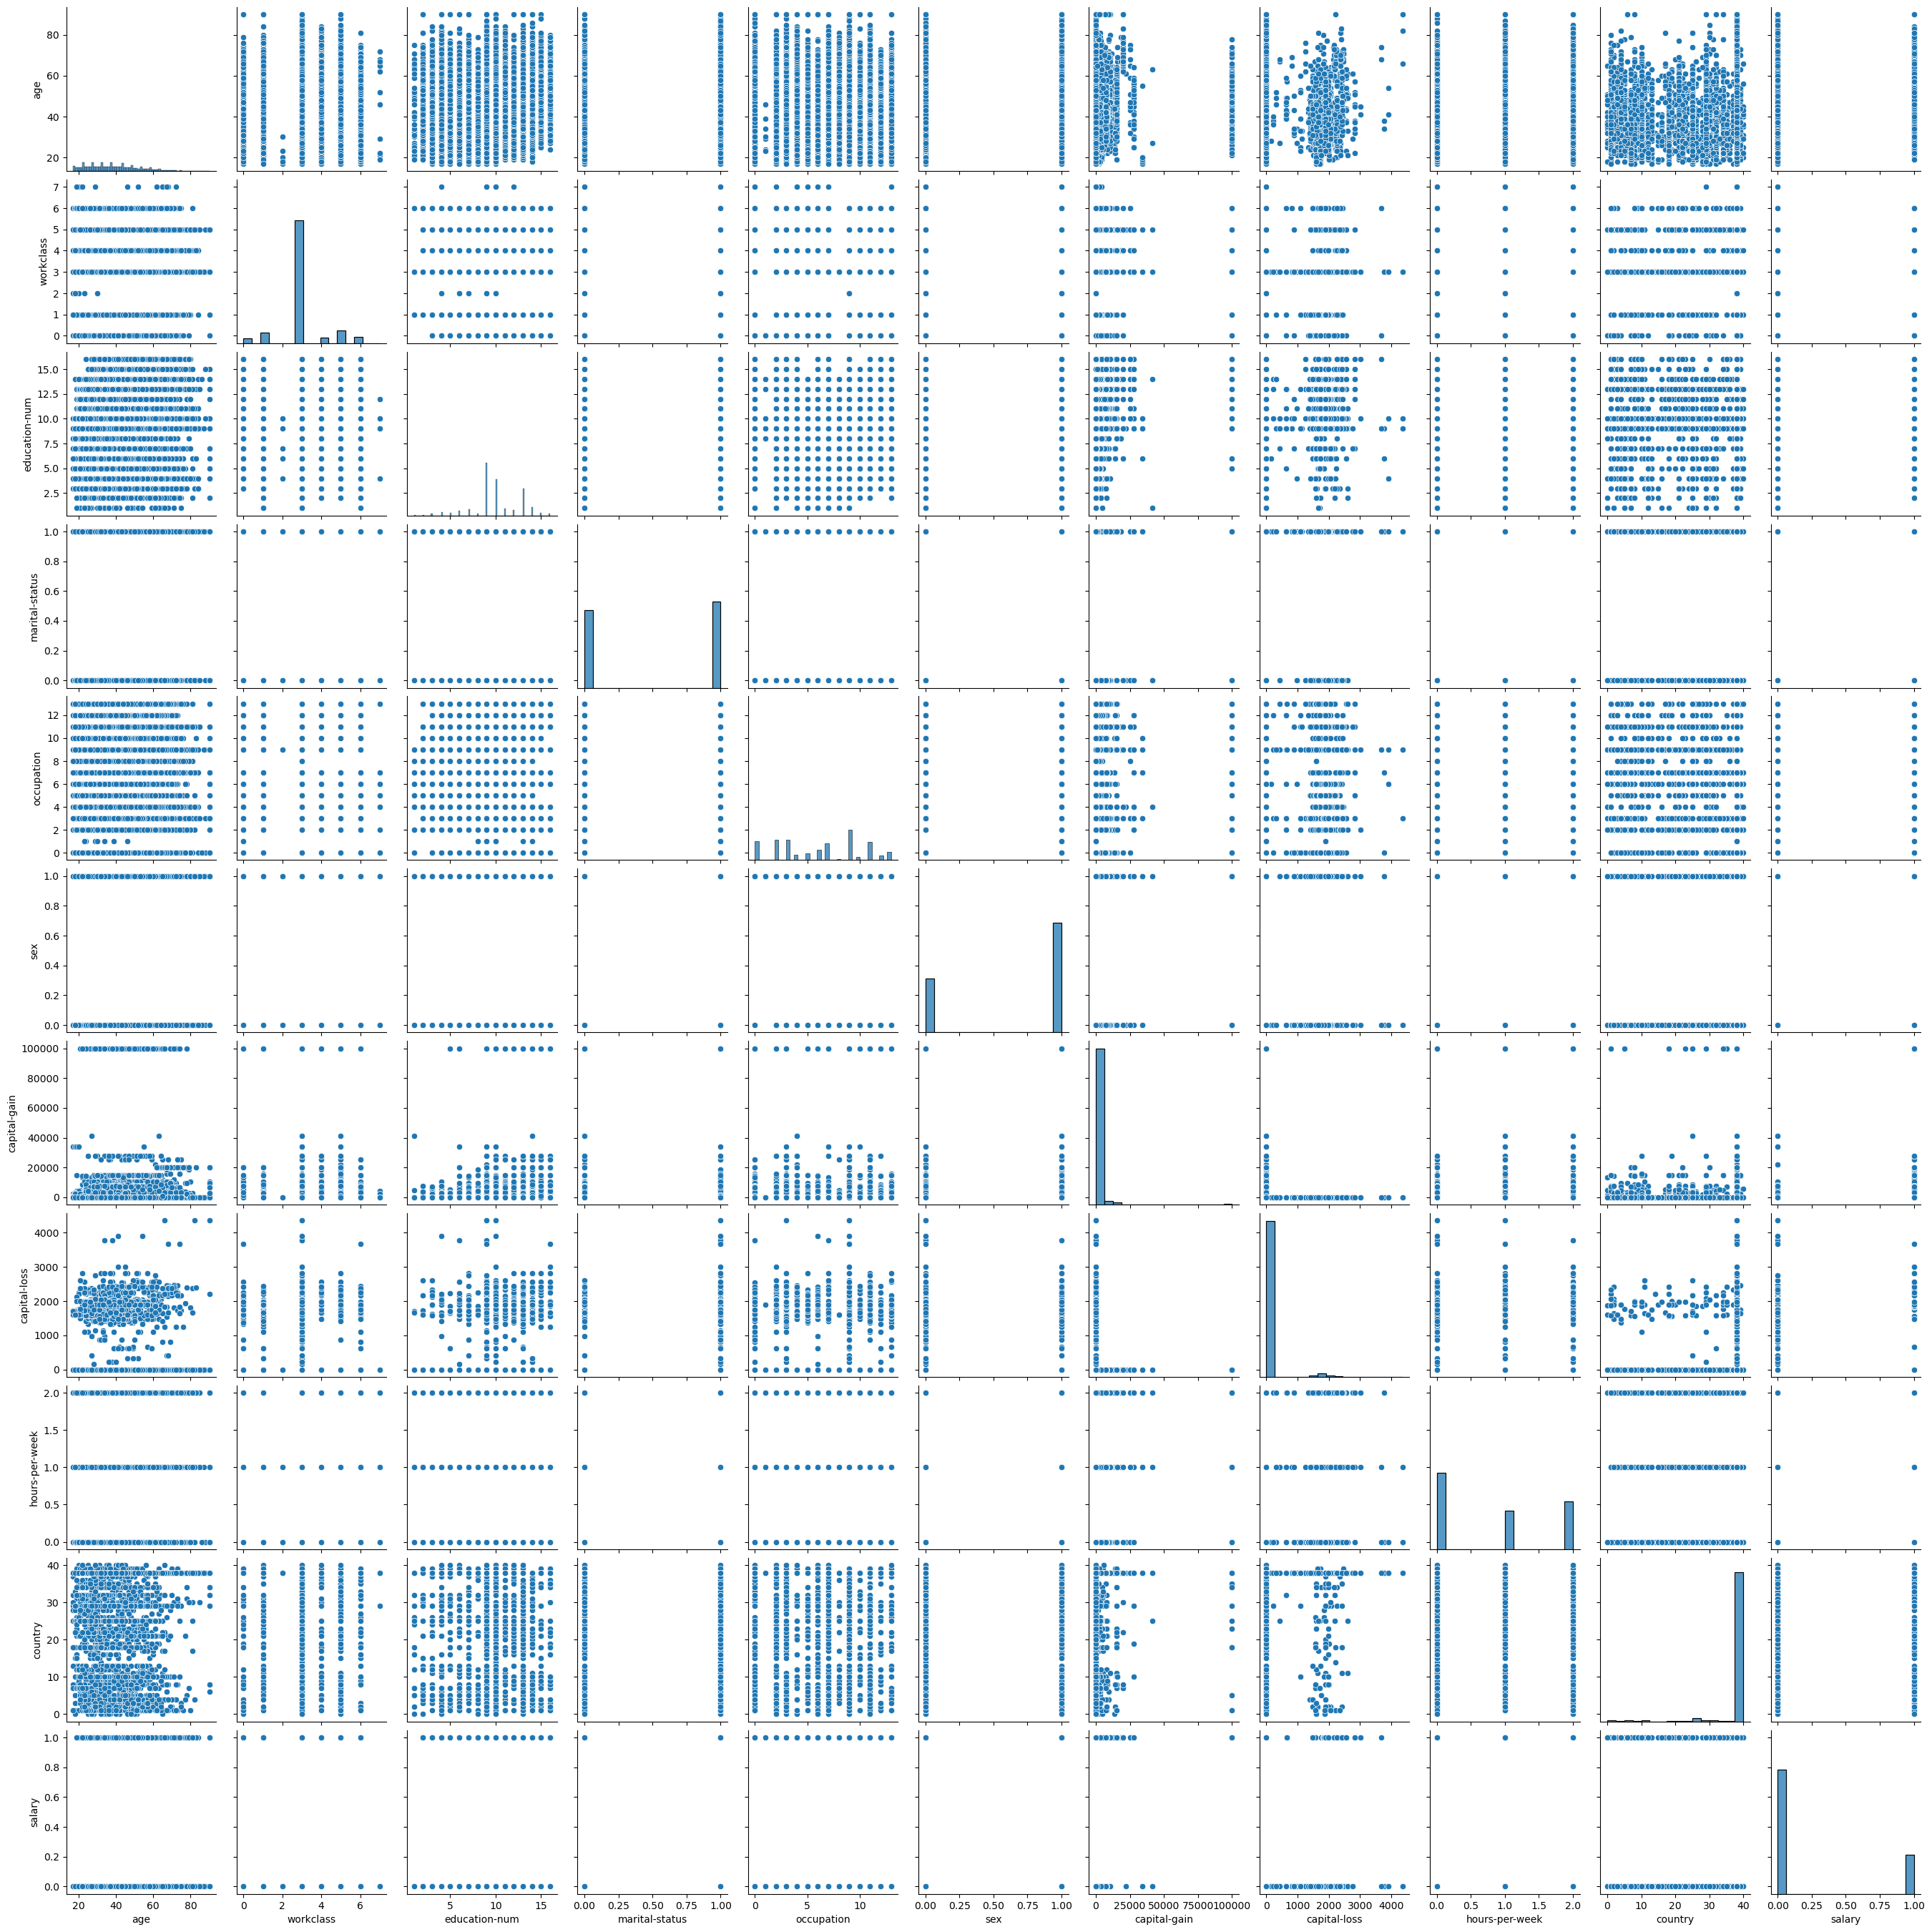

In [42]:
sns.pairplot(df,hue=None)

### Model train and test 

## Logistic Regression

In [43]:
logistic = LogisticRegression()

In [44]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [45]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y)
logistic.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred = logistic.predict(X_test)

In [47]:
print(confusion_matrix(y_test,y_pred))

[[5787  399]
 [1058  897]]


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6186
           1       0.69      0.46      0.55      1955

    accuracy                           0.82      8141
   macro avg       0.77      0.70      0.72      8141
weighted avg       0.81      0.82      0.81      8141



In [49]:
print("Accurracy",round(accuracy_score(y_test, y_pred)*100),"%")

Accurracy 82 %


## Random Forest 

In [50]:
random_forest = RandomForestClassifier(n_estimators=10,
                            random_state=0)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [51]:
print(confusion_matrix(y_test,Y_prediction))

[[5634  552]
 [ 793 1162]]


In [52]:
print(classification_report(y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6186
           1       0.68      0.59      0.63      1955

    accuracy                           0.83      8141
   macro avg       0.78      0.75      0.76      8141
weighted avg       0.83      0.83      0.83      8141



In [53]:
print("Accurracy",round(accuracy_score(y_test, Y_prediction)*100),"%")

Accurracy 83 %


## Decision tree 

In [54]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=10)  
classifier.fit(X_train, y_train)  


DecisionTreeClassifier(criterion='entropy', random_state=10)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
print("Accurracy",  round(accuracy_score(y_test,  y_pred)*100),  "%")

Accurracy 82 %
